# Titanic- kaggle- master

#### Importing Libraries

In [1]:
import numpy as np
import math 
import pandas as pd

#Visualizing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image,display

#Warnings Dealing
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [2]:
cd C:\Users\Abhinav Gupta\Downloads

C:\Users\Abhinav Gupta\Downloads


#### Reading the train and the test data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Visualization (Exploratory Analysis)

* *Creating a visual copy of the training set (train) to use it in* **exploratory analysis**

In [5]:
visual_df = train.copy()

* *Changing survived column : 0 - Dead ; 1 - Survived*

In [6]:
survive_map = {0 : 'Dead', 1 : 'Survived' }
visual_df['Survived'] = visual_df.Survived.map(survive_map)

### 1) Sex Trend:

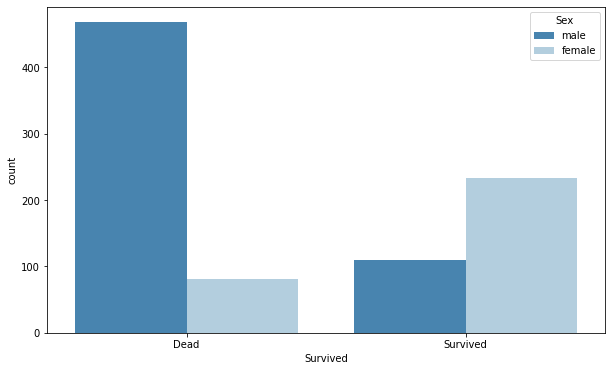

In [7]:
plt.figure(figsize = [10,6])
sns.countplot('Survived', hue = 'Sex', data = visual_df, palette= 'Blues_r')

   *  It is clear form the graph that female where likely to survive and most of the male passengers died
      

###  2) Age Trend:

Text(0.5, 0, 'Age')

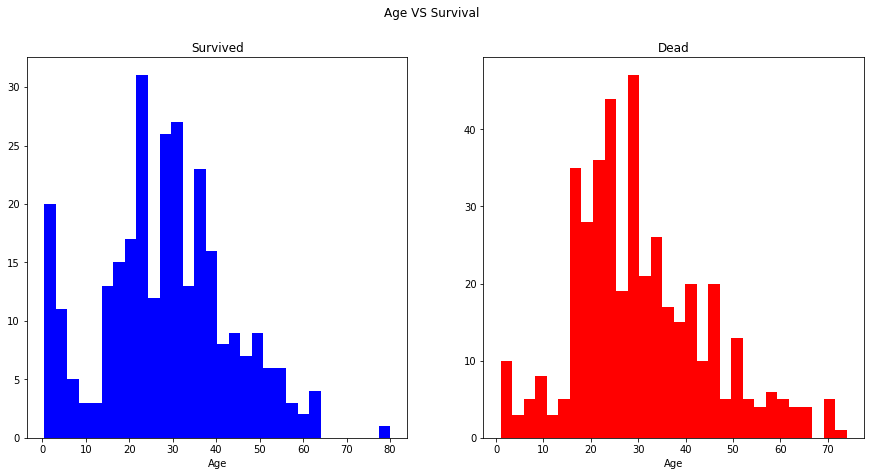

In [8]:
survived = visual_df[visual_df['Survived'] == 'Survived']['Age']
dead = visual_df[visual_df['Survived'] == 'Dead']['Age']

fig, axis = plt.subplots(nrows = 1, ncols = 2,figsize = [15,7])
axis[0].hist(survived, bins = 30, color = 'blue')
axis[1].hist(dead, bins = 30, color = 'red',)
fig.suptitle('Age VS Survival')
axis[0].set_title('Survived')
axis[1].set_title('Dead')
axis[0].set_xlabel('Age')
axis[1].set_xlabel('Age')

   * As you can see in the blue graph(Survival) there is a huge number of people in the smaller age range(0-10). Hence
     children were given a priority to be saved 

### 3) Age and Sex Trend:

In [4]:
plt.figure(figsize = [10,6])
sns.violinplot(x = 'Survived', y='Age', hue= 'Sex',data = visual_df, palette = 'cool')

NameError: name 'visual_df' is not defined

<Figure size 720x432 with 0 Axes>

In [10]:
img = Image(url = 'https://i.imgflip.com/244i5x.jpg')
display(img)

####  It is clear from the third trend that women and children were likely to survive the titanic crash  

 * *Now we know the meaning of the iconic dialogue* - **"Women And Children First"**

### 4) Pclass Trend:

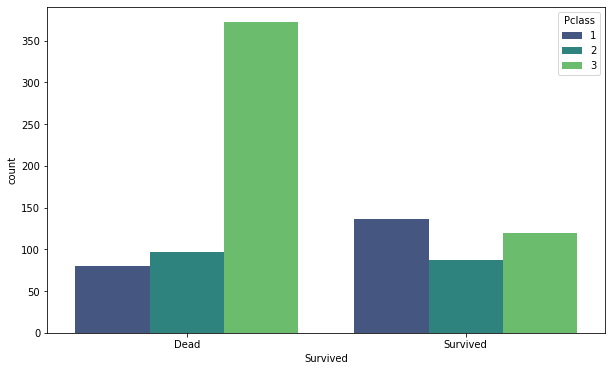

In [11]:
plt.figure(figsize = [10,6])
sns.countplot('Survived', hue = 'Pclass', data = visual_df, palette= 'viridis')

   * People from class 3 were likely to die... And from those who survived, 1st class was the majority..

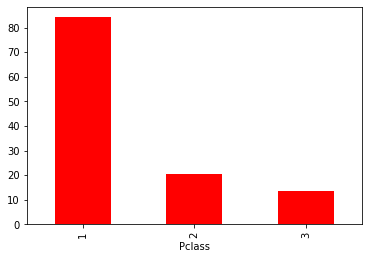

In [12]:
visual_df.groupby('Pclass')['Fare'].mean().plot(kind= 'bar', color = 'red')

   * As you can see... Ticket Fare for 1st class is maximum.. Hence those who paid more survived more...

In [13]:
img = Image(url = 'https://img.ifunny.co/images/37466d0825c72a47f66db383d612bac1e22207ac4c5f403f9506adcec001e3b2_1.jpg')
display(img)

####  LOOL right?

## Data Preprocessing (Feature Engineering)

   * Creating A column To store the title of each name in the datasets

#####  1) Name:

In [5]:
train_test = [train, test]
for dataset in train_test:
    temp = []
    for i in dataset['Name']:
        obj = i.split(',')[1]
        temp.append(obj.split('.')[0].lstrip())
        
    dataset['Title'] = temp

In [6]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
the Countess      1
Ms                1
Jonkheer          1
Don               1
Sir               1
Mme               1
Capt              1
Name: Title, dtype: int64

In [7]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

  * *Now Mapping the title as:*
  
      **1) Mr = 0**
      
      **2) Miss = 1**
      
      **3) Mrs = 2**
      
      **4) Others = 3**

In [8]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"the Countess": 3, 
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Mme": 3,"Capt": 3, "Sir": 3}

train_test = [train, test]

for dataset in train_test:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [19]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [9]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


   * As now we have a title column... There is no need for the Name column

In [10]:
train_test = [train, test]

for dataset in train_test:
    dataset.drop('Name', inplace = True, axis = 1)

#####  2) Age:

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [23]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64

   * As you can see there are a lot of missing values in Age .. Hence it would make sense to replace those values according to the mean of the Title

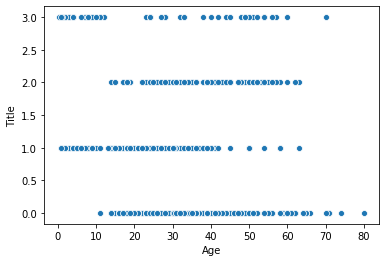

In [24]:
sns.scatterplot('Age', 'Title', data = train)

In [12]:
train.groupby('Title')['Age'].mean()

Title
0    32.368090
1    21.773973
2    35.898148
3    20.430161
Name: Age, dtype: float64

   * Hence replacing of Age with the mean

In [13]:
# For Training Set
for index, values in train.iterrows():
        if(math.isnan(values['Age'])):
            if(values['Title'] == 0):
                train.iloc[index,4] = train.groupby('Title')['Age'].mean()[0]
            elif(values['Title'] == 1):
                train.iloc[index,4] = train.groupby('Title')['Age'].mean()[1]
            elif(values['Title'] == 2):
                train.iloc[index,4] = train.groupby('Title')['Age'].mean()[2]
            else:
                train.iloc[index,4] = train.groupby('Title')['Age'].mean()[3]
            

In [14]:
# For Test Set
for index, values in test.iterrows():
        if(math.isnan(values['Age'])):
            if(values['Title'] == 0):
                test.iloc[index,3] = test.groupby('Title')['Age'].mean()[0]
            elif(values['Title'] == 1):
                test.iloc[index,3] = test.groupby('Title')['Age'].mean()[1]
            elif(values['Title'] == 2):
                test.iloc[index,3] = test.groupby('Title')['Age'].mean()[2]
            else:
                test.iloc[index,3] = test.groupby('Title')['Age'].mean()[3]
            

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64

In [18]:
train.Age = train.Age.astype(int)
test.Age = test.Age.astype(int)

##### 3) Sex:

In [19]:
train_test = [train , test]

sex_mapping = {'male':0, 'female':1}
for df in train_test:
    df['Sex'] = df['Sex'].map(sex_mapping)

##### 4) Embarked:

In [20]:
train_test = [train , test]

for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
embarked_mapping = {"S": 0, "C": 1, "Q": 2}

for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [33]:
dataset.Embarked.value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

   * We still have some missing values in the test set

In [21]:
test['Title'].fillna(0,inplace = True)

In [22]:
test['Fare'].fillna(train.Fare.mean(),inplace = True)

In [23]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [24]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

  * Now dropping Ticket and Cabin as they have too many missing values and of no use

In [25]:
train_test = [train, test]

for dataset in train_test:
    dataset.drop(['Ticket','Cabin'], inplace = True, axis = 1)


In [26]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22,1,0,7.2500,0,0
1,2,1,1,1,38,1,0,71.2833,1,2
2,3,1,3,1,26,0,0,7.9250,0,1
3,4,1,1,1,35,1,0,53.1000,0,2
4,5,0,3,0,35,0,0,8.0500,0,0


In [27]:
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34,0,0,7.8292,2,0.0
1,893,3,1,47,1,0,7.0000,0,2.0
2,894,2,0,62,0,0,9.6875,2,0.0
3,895,3,0,27,0,0,8.6625,0,0.0
4,896,3,1,22,1,1,12.2875,0,2.0


##  Predictive Analysis

In [29]:
train.drop('PassengerId', axis = 1, inplace= True)
trainsample = train.copy()
testsample = test.copy()

In [30]:
X = trainsample.iloc[:, 1:]
y = trainsample.iloc[: ,0]
X_test = testsample.iloc[: , 1:]

  * **We will encode the variable like Pclass, Embarked and title** 

In [31]:
# Encode categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columntransformer = ColumnTransformer([("one_hot_encoder", OneHotEncoder(), [0,6,7])], remainder= "passthrough")
X = pd.DataFrame(columntransformer.fit_transform(X))

columntransformer_test = ColumnTransformer([("one_hot_encoder", OneHotEncoder(), [0,6,7])], remainder= "passthrough")
X_test = pd.DataFrame(columntransformer_test.fit_transform(X_test))

  * Now dropping each of the first columns after **One Hot Encoding**

In [32]:
X.drop([0,3,6], inplace = True, axis = 1)
X_test.drop([0,3,6], inplace = True, axis = 1)

   * Remaining Columns

In [33]:
X.columns = [0,1,2,3,4,5,6,7,8,9,10,11]
X_test.columns = [0,1,2,3,4,5,6,7,8,9,10,11]

In [34]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,0.0,7.2500
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,8.0500


In [35]:
X_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,7.8292
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,47.0,1.0,0.0,7.0000
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,9.6875
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,8.6625
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,22.0,1.0,1.0,12.2875


   * Now we need to scale the data in the 8th and` the 11th columns

   * We will do that usin **Sklearn.preprocessing -- StandardScaler library**

In [40]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X.iloc[:,[8,11]] = sc1.fit_transform(X.iloc[:,[8,11]])
X_test.iloc[:,[8,11]]= sc2.fit_transform(X_test.iloc[:,[8,11]])

In [41]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.582783,1.0,0.0,-0.502445
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.630440,1.0,0.0,0.786845
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.279477,0.0,0.0,-0.488854
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.402961,1.0,0.0,0.420730
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402961,0.0,0.0,-0.486337


In [42]:
X_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.295811,0.0,0.0,-0.498258
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.301089,1.0,0.0,-0.513125
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.461024,0.0,0.0,-0.464940
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.245492,0.0,0.0,-0.483317
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.632137,1.0,1.0,-0.418323


   * Now our data is ready and its time for the **Fun Part**

   * **Importing Libraries**

In [43]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

   **We will Also run K-Fold Cross Validation**

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### 1) K Nearest Neighbours

In [45]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

classifier = KNeighborsClassifier(n_neighbors = 13)

accuracies = cross_val_score(classifier, X, y, cv = k_fold, scoring = 'accuracy')

print(accuracies.mean())


0.8058426966292135


#### 2) Random Forest

In [46]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

classifier = RandomForestClassifier(n_estimators = 100, max_depth= 50)

accuracies = cross_val_score(classifier, X, y, cv = k_fold, scoring = 'accuracy')

print(accuracies.mean())


0.8170536828963796


#### 3) Decision Tree

In [47]:
classifier = DecisionTreeClassifier()

accuracies = cross_val_score(classifier, X, y, cv = k_fold, scoring = 'accuracy')

print(accuracies.mean())

0.7688139825218477


#### 4) Support Vector Machines

In [48]:
classifier = SVC()

accuracies = cross_val_score(classifier, X, y, cv = k_fold, scoring = 'accuracy')

print(accuracies.mean())

0.8305243445692883


#### 5) Logistic Regression

In [49]:
classifier = LogisticRegression()

accuracies = cross_val_score(classifier, X, y, cv = k_fold, scoring = 'accuracy')

print(accuracies.mean())

0.8137078651685392


  **As we can see Support Vector machines gives us the best Result we will use it for training our model**

In [50]:
classifier = SVC()


In [51]:
classifier.fit(X , y)
y_pred = classifier.predict(X_test)

In [52]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
finalanswer = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })

In [54]:
finalanswer.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


 **Creating our final csv file**

In [55]:
finalanswer.to_csv('submission.csv', index=False)

####  This is not my best attempt.. I am soon going to apply Grid Search on the random forest algortihm to get the best value
#### After that i am going to use Keras and Tensorflow for the Deep Learning analysis...
# Stay Tuned... Peace:)